In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [7]:
# Read data
df = pd.read_csv("./All Data.csv")
df.describe()

,GP,W,L,AGT,K,D,KD,CKPM,GPR,GSPD,...,LNE%,JNG%,WPM,CWPM,WCPM,win_rate,EGR,MLR,year,msi_placed
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,9.719298,4.859649,4.859649,34.390476,125.087719,125.428571,1.012005,0.746416,-0.155388,-0.012301,...,0.447987,0.453461,3.219173,0.975764,1.288195,44.597018,32.896491,-2.355388,2017.949875,0.000000
std,6.239073,4.208791,3.513842,3.457307,92.600155,84.898990,0.536490,0.146694,1.053208,0.075798,...,0.152075,0.141766,1.076066,0.439101,0.473416,25.363616,24.840955,15.627106,2.068547,0.448336
min,2.000000,0.000000,0.000000,24.500000,5.000000,8.000000,0.170000,0.330000,-4.840000,-0.326000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56.300000,2015.000000,-1.000000
25%,5.000000,2.000000,3.000000,32.050000,54.000000,66.000000,0.720000,0.650000,-0.605000,-0.049000,...,0.490500,0.460500,3.075000,0.695000,1.140000,26.390000,0.000000,-8.950000,2016.000000,0.000000
50%,8.000000,4.000000,4.000000,34.300000,104.000000,95.000000,0.950000,0.740000,0.000000,0.000000,...,0.498000,0.492000,3.440000,1.100000,1.390000,42.860000,41.100000,0.000000,2018.000000,0.000000
75%,13.500000,7.000000,6.000000,36.400000,176.500000,161.500000,1.220000,0.850000,0.425000,0.028500,...,0.505000,0.517000,3.770000,1.300000,1.575000,60.555000,53.200000,1.200000,2019.000000,0.000000
max,28.000000,26.000000,25.000000,48.500000,477.000000,460.000000,7.000000,1.130000,3.210000,0.269000,...,0.521000,0.613000,5.410000,1.780000,2.140000,100.000000,82.300000,53.400000,2021.000000,1.000000


In [8]:
# Separate playoffs games and MSI games
playMask = df['msi_placed'] >= 0
msiMask = df['msi_placed'] == -1
playoffs = df[playMask]
msi = df[msiMask]
playoffs

,GP,W,L,AGT,K,D,KD,CKPM,GPR,GSPD,...,WPM,CWPM,WCPM,win_rate,Team,division,EGR,MLR,year,msi_placed
0,13,7,6,42.7,239,235,1.02,0.85,0.00,0.000,...,0.00,0.00,0.00,53.85,7th heaven,LJL,0.0,0.0,2015,0
1,14,6,8,35.8,214,269,0.80,0.96,-0.89,-0.062,...,2.21,0.32,0.69,42.86,ATLAS eSports Team,TCL,0.0,0.0,2015,0
2,6,1,5,39.3,80,121,0.66,0.85,0.00,0.000,...,0.00,0.00,0.00,16.67,Bencheados,LLA,0.0,0.0,2015,0
3,14,12,2,33.9,291,175,1.66,0.98,1.47,0.153,...,2.37,0.34,0.82,85.71,Beşiktaş Esports,TCL,0.0,0.0,2015,1
5,14,4,10,36.8,214,263,0.81,0.92,-1.12,-0.092,...,2.47,0.31,0.75,28.57,Big Plays Incorporated,TCL,0.0,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,8,6,2,34.1,143,80,1.79,0.82,0.84,0.075,...,2.80,0.96,1.30,75.00,Unicorns of Love.CIS,LCL,45.7,29.3,2021,1
393,17,10,7,31.7,207,182,1.14,0.72,0.54,0.040,...,3.20,1.40,1.47,58.82,V3 Esports,LJL,50.9,8.0,2021,0
394,8,4,4,30.7,97,84,1.15,0.74,-0.01,0.024,...,3.25,1.37,1.41,50.00,Vorax Liberty,CBLOL,48.0,2.0,2021,0
396,14,9,5,31.7,198,191,1.04,0.88,0.57,0.025,...,3.68,1.49,1.46,64.29,paiN Gaming,CBLOL,63.1,1.2,2021,1


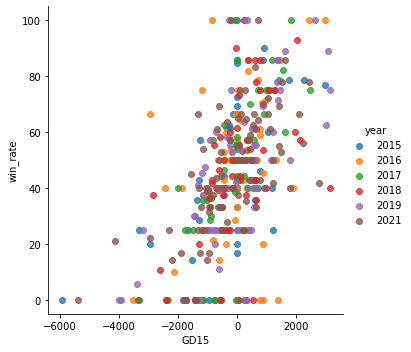

In [9]:
sns.lmplot(data = data, x = 'GD15', y = 'win_rate', hue = 'year', fit_reg = False)

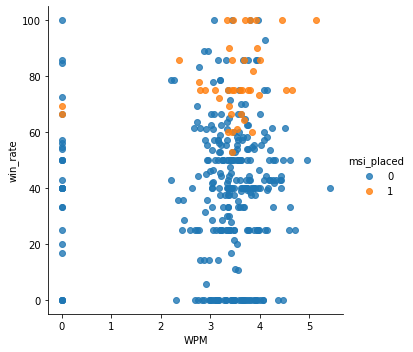

In [21]:
sns.lmplot(data = playoffs, x = 'WPM', y = 'win_rate', hue = 'msi_placed', fit_reg = False)